## Name : E F Umair Ahmed

## The Sparks Foundation Grip-Data Science & Business Analytics April - 2022

Task 1 -- Prediction Using Supervised ML (Linear Regression)

Problem -- Predicting the Score based on Hours

In [2]:
###Importing all the required Libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Reading data from remote link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")
df.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Discover And Visualizing the Data And Understanding Insights

In [7]:
df.shape

(25, 2)

In [ ]:
# contains 25 rows and 2 columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
# contains float and int data type 

In [8]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
# checking for nulll values 
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

### Checking the Distribution of Score w.r.t Hours 

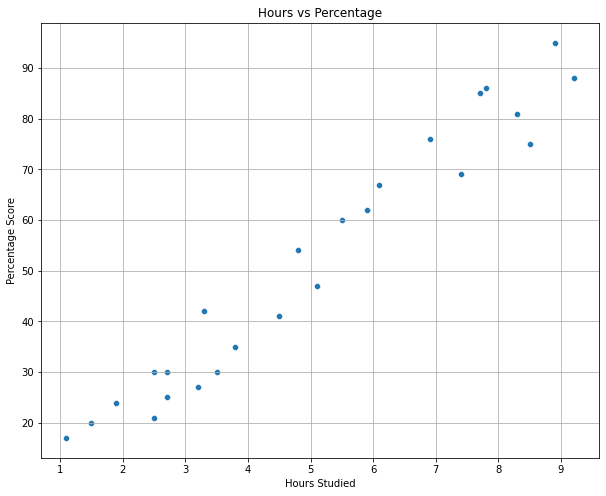

In [11]:
# Plotting the distribution of scores
plt.figure(figsize=(10,8))
sns.scatterplot(df['Hours'],df['Scores'])
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.grid()
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### Preparing the data

dividing the data into inputs and outputs

In [12]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [ ]:
# doing OLS model for getting statistical information

In [13]:
import statsmodels.api as sm 
xc = sm.add_constant(X)
model = sm.OLS(y,xc).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Sat, 16 Apr 2022   Prob (F-statistic):           9.13e-17
Time:                        11:55:56   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4837      2.532      0.981      0.337      -2.753       7.721
x1             9.7758      0.453     21.583      0.000       8.839      10.713
==============================================================================
Omnibus:                        7.616   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                2.137
Skew:                          -0.216   Prob(JB):                        0.343
Kurtosis:                       1.634   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
# spilting the data into train and test using train_test_split from sklearn package
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.3, random_state=0) 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17, 1)
(8, 1)
(17,)
(8,)


## Training the Data 

In [16]:
from sklearn.linear_model import LinearRegression  
lr = LinearRegression()  
lr.fit(X_train, y_train) 
print("Training complete.")

Training complete.


In [19]:
lr.coef_

array([9.78856669])

In [20]:
lr.intercept_

2.3708153823418883

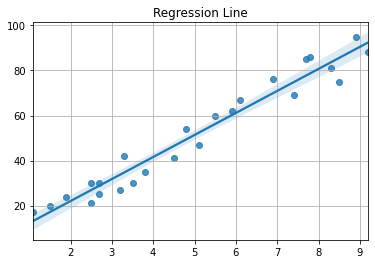

In [23]:
# Plotting the regression line
sns.regplot(X,y)
plt.title('Regression Line')
plt.grid()
plt.show()

In [24]:
# Making the Prediction
print(X_test)
ypred=lr.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [25]:
ypred

array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883,
       39.56736879, 20.96909209, 78.72163554])

In [27]:
# Comparing Actual vs Predicted
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': ypred})  
df1

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


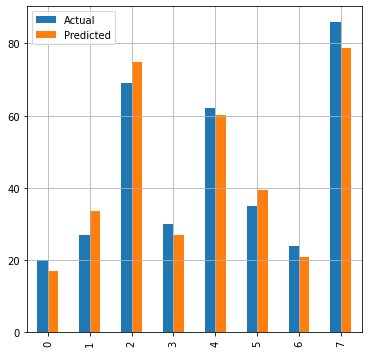

In [29]:
df1.plot(kind='bar',figsize=(6,6))
plt.grid()
plt.show()

In [30]:
lr.score(X_test,y_test)

0.9568211104435257

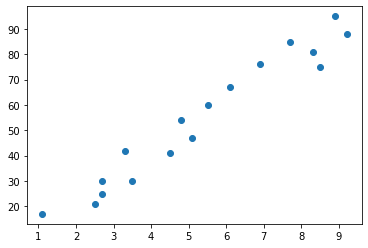

In [33]:
plt.scatter(X_train,y_train)
plt.show()

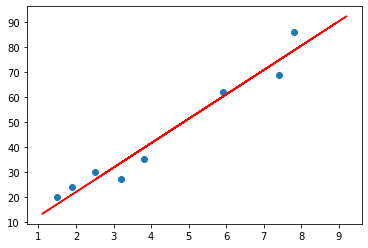

In [35]:
plt.scatter(X_test,y_test)
plt.plot(X_train,lr.predict(X_train),color='r')
plt.show()

In [38]:
# You can also test with your own data
hours = np.array(9.25)
own_pred = lr.predict(hours.reshape(-1, 1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.91505723477056


## Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [36]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, ypred))

Mean Absolute Error: 4.419727808027651


In [37]:
print('R2_Score:',metrics.r2_score(y_test,ypred))

R2_Score: 0.9568211104435257


In [ ]:
## the R2 Score is 95 which is a good Score